In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import load_model
from keras.preprocessing import image


import numpy as np
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale = 1.0/255.0,validation_split = 0.2)

In [3]:
train_data = datagen.flow_from_directory("/kaggle/input/muffin-vs-chihuahua-image-classification/train/",
                                         class_mode = "categorical",target_size = (224, 224),
                                                 batch_size = 32, subset = "training")
validation_data = datagen.flow_from_directory("/kaggle/input/muffin-vs-chihuahua-image-classification/train/", 
                                        class_mode = "categorical",target_size = (224, 224),
                                                 batch_size = 32, subset = "validation")

Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.


In [4]:
conv_base = VGG19(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3)
)

2023-01-04 04:30:31.770065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 04:30:31.930758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 04:30:31.931546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 04:30:31.933443: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step


In [5]:
conv_base.trainable = False

In [6]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1254450   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 21,278,936
Trainable params: 1,254,552
Non-trainable params: 20,024,384
_________________________________________________________________


In [7]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
history = model.fit(train_data, epochs = 2, validation_data = validation_data)

2023-01-04 04:30:50.854248: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


2023-01-04 04:30:52.821010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


119/119 [==============================] - 82s 606ms/step - loss: 0.2045 - accuracy: 0.9279 - val_loss: 0.0815 - val_accuracy: 0.9725
Epoch 2/2
119/119 [==============================] - 57s 476ms/step - loss: 0.0489 - accuracy: 0.9868 - val_loss: 0.0726 - val_accuracy: 0.9746


In [9]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [16]:
m = load_model("model_vgg19.h5")

In [17]:
test_data = datagen.flow_from_directory("/kaggle/input/muffin-vs-chihuahua-image-classification/test/",
                                         class_mode = "categorical",target_size = (224, 224),
                                                 batch_size = 32)

Found 1184 images belonging to 2 classes.


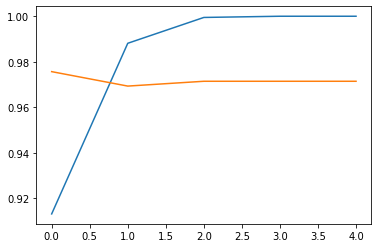

In [16]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')

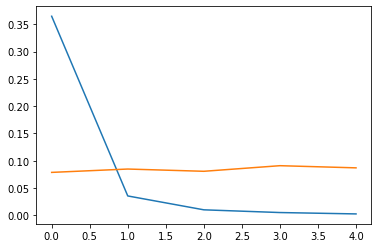

In [19]:
plt.plot(history.history['loss'], label = 'training accuracy')
plt.plot(history.history['val_loss'], label = 'validation accuracy')

In [2]:
import cv2
test_image = cv2.imread("/kaggle/input/image1234/muffin1.jpg")

In [3]:
test_image = test_image/255.0

In [4]:
test_image.shape

(224, 224, 3)

In [5]:
test_image = test_image.reshape(1,224,224,3)

In [42]:
pred = m.predict(test_image)

In [47]:
pred


array([1])

In [21]:
y_pred = np.argmax(y_pred,axis=1)

In [22]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [2]:
import cv2

In [50]:
img = cv2.imread("/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_0_106,-1)

In [51]:
img = cv2.resize(img,dsize = (224,224))

In [52]:
img.shape

(224, 224, 3)

In [53]:
img = img.reshape(-1,224,224,3)

In [54]:
y = model.predict(img)

In [55]:
y = np.argmax(y, axis = 1)

In [56]:
y

array([1])

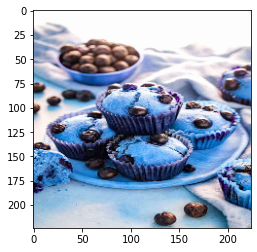

In [57]:
plt.imshow(img.reshape(224,224,3))